# RIDGE AND LASSO IMPLEMENTATION




## IMPORTING PACKAGES

In [1]:
#For model building
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
pd.pandas.set_option('display.max_columns',None)


#for implementing Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# for hiding warning
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\CarPrice_Assignment.csv")
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


Data On Car To Tell About the Price of the Car with given columns as featuures of that car, where each column is a distint feature.

In [3]:
#for shape
data.shape

(205, 26)

The Data has 205 rows and 26 Columns.

In [4]:
#for info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

It is telling about the data types of all columns and how many not null values are present in that column.

In [5]:
#for a rough idea about all numerical columns
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


It is telling about the range of the data at various percentiles as well as telling the mean and standard deviation about all numerical columns. 

## Data Preparation And Data Cleaning

In [6]:
#changing Car name into Company Name by spliting the model name from the values
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])

data.insert(3,"CompanyName",CompanyName)

data.drop(['CarName'],axis=1,inplace=True)

data.head(10)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
#dropping car id column as it is not necessary for model
data.drop(['car_ID'],axis=1,inplace=True)

#changing the values of doornumber to a unique name as after dummy the column name is not same
data["doornumber"].replace({"two": "two1", "four": "four1"}, inplace=True)

#changing company name to lower case
data.CompanyName = data.CompanyName.str.lower()

#custom function to replace same names but of different spellings
def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

#calling function where the name needs to be changed
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

#printing the unique values of column
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
#checking for null values
data.isnull().sum()

symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Outliers Finding And Treatment

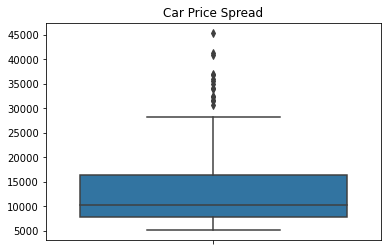

In [9]:
#boxplot for price column
plt.title('Car Price Spread')
sns.boxplot(y = [data.price])

(190, 25)

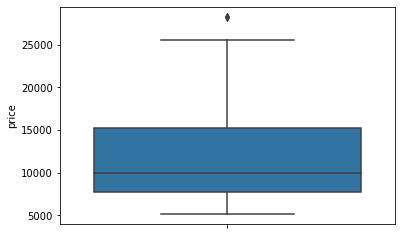

In [10]:
# treating outliers with IQR method for price as it is important column
percentile25 = data['price'].quantile(0.25)
percentile75 = data['price'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data = data[data['price'] < upper_limit]

sns.boxplot(y=data.price)

data.shape

In [11]:
#checking at different percentiles
print(data.price.describe(percentiles = [0.10,0.25,0.50,0.75,0.85,0.90,1]))


count      190.000000
mean     11509.400879
std       4968.444389
min       5118.000000
10%       6570.400000
25%       7701.250000
50%       9959.500000
75%      15197.500000
85%      17022.500000
90%      18286.400000
100%     28248.000000
max      28248.000000
Name: price, dtype: float64


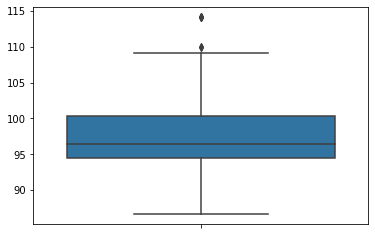

In [12]:
#for wheelbase
sns.boxplot(y = [data.wheelbase])

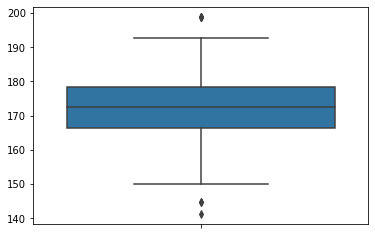

In [13]:
#for carlength
sns.boxplot(y = [data.carlength])

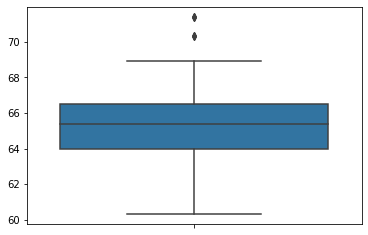

In [14]:
#for carwidth
sns.boxplot(y = [data.carwidth])

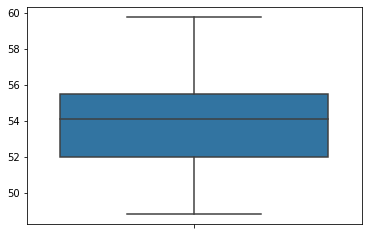

In [15]:
#for carheight
sns.boxplot(y = [data.carheight])

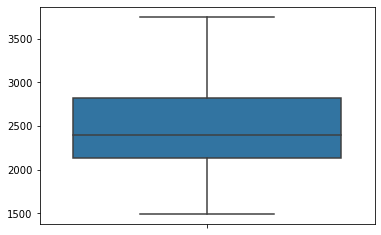

In [16]:
#for cuberweight
sns.boxplot(y = [data.curbweight])

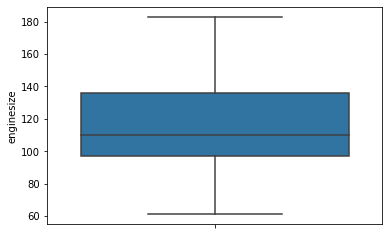

In [17]:
#for enginesize
sns.boxplot(y=data.enginesize)

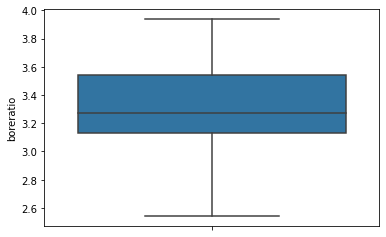

In [18]:
#for boreratio
sns.boxplot(y=data.boreratio)

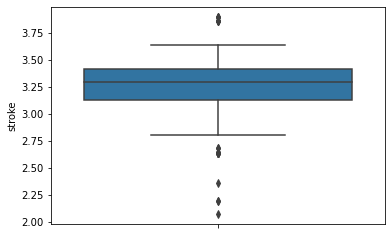

In [19]:
#for stroke
sns.boxplot(y=data.stroke)

(173, 25)

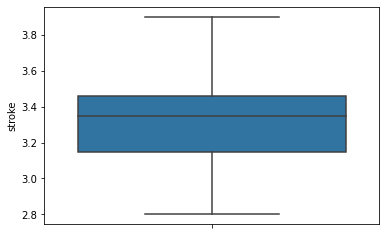

In [20]:
#treating outlier for stroke column
percentile25 = data['stroke'].quantile(0.25)
percentile75 = data['stroke'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data = data[data['stroke'] > lower_limit]

sns.boxplot(y=data.stroke)

data.shape

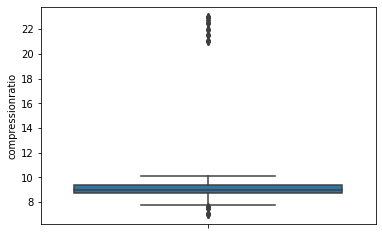

In [21]:
#for compressionratio
sns.boxplot(y=data.compressionratio)

In [22]:
data.shape

(173, 25)

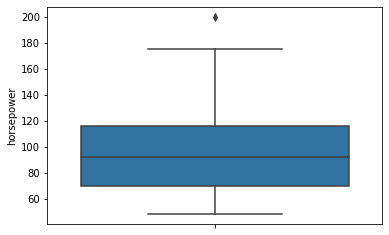

In [23]:
#for horsepower
sns.boxplot(y=data.horsepower)

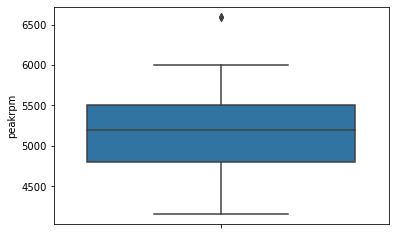

In [24]:
#for peakrpm
sns.boxplot(y=data.peakrpm)

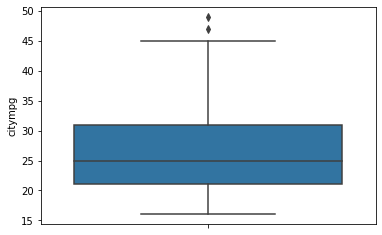

In [25]:
#for citympg
sns.boxplot(y=data.citympg)

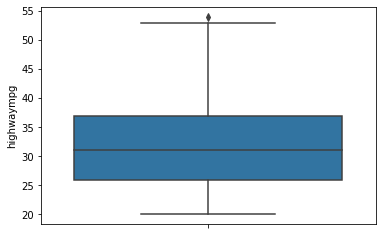

In [26]:
#for highwaympg
sns.boxplot(y=data.highwaympg)

## Dummy Variables

In [27]:
# selecting all object columns in the variable data1
data1 = data.select_dtypes(include = ['object'])
data1.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
2,alfa-romero,gas,std,two1,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four1,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four1,sedan,4wd,front,ohc,five,mpfi
5,audi,gas,std,two1,sedan,fwd,front,ohc,five,mpfi
6,audi,gas,std,four1,sedan,fwd,front,ohc,five,mpfi


In [28]:
#creating dummies of all object columns with dropping first dummy from each column by drop_first
dummies = pd.get_dummies(data1,drop_first = True)
dummies.head()

,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two1,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
#dropping columns of which we have made dummies
data = data.drop(list(data1.columns),axis=1)

#concatinating the dummy variables
data = pd.concat([data,dummies],axis=1)

#checking the shape
data.shape

(173, 58)

In [30]:
#checking the prepared data
data.head(20)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two1,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,17859.167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
10,2,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.80,101,5800,23,29,16430.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
11,0,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.80,101,5800,23,29,16925.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [31]:
#info of cleaned data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 2 to 204
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               173 non-null    int64  
 1   wheelbase               173 non-null    float64
 2   carlength               173 non-null    float64
 3   carwidth                173 non-null    float64
 4   carheight               173 non-null    float64
 5   curbweight              173 non-null    int64  
 6   enginesize              173 non-null    int64  
 7   boreratio               173 non-null    float64
 8   stroke                  173 non-null    float64
 9   compressionratio        173 non-null    float64
 10  horsepower              173 non-null    int64  
 11  peakrpm                 173 non-null    int64  
 12  citympg                 173 non-null    int64  
 13  highwaympg              173 non-null    int64  
 14  price                   173 non-null    fl

## Checking MultiColinearity

In [32]:
#code for easily checking highlycorrelated with respect to y(objective) column
cor_matrix = data.corr().abs()
print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                        symboling  wheelbase  carlength  carwidth  carheight  \
symboling                1.000000   0.507227   0.326419  0.189256   0.557731   
wheelbase                0.507227   1.000000   0.866899  0.789627   0.626234   
carlength                0.326419   0.866899   1.000000  0.827269   0.543475   
carwidth                 0.189256   0.789627   0.827269  1.000000   0.327538   
carheight                0.557731   0.626234   0.543475  0.327538   1.000000   
curbweight               0.229895   0.793844   0.872035  0.840016   0.388815   
enginesize               0.146513   0.605642   0.706602  0.712771   0.195807   
boreratio                0.133126   0.628459   0.718060  0.626538   0.264494   
stroke                   0.115320   0.086031   0.145465  0.249049   0.131435   
compressionratio         0.186339   0.320744   0.201553  0.233225   0.290871   
horsepower               0.073519   0.402333   0.574673  0.614459   0.033706   
peakrpm                  0.257999   0.35

In [33]:
#saving columns which have colinearity more than 0.60 in a list to drop that column
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.60)]

#removing all important columns from list to be included in model
to_drop.remove("price")
to_drop.remove("carlength")
to_drop.remove("curbweight")
to_drop.remove("enginesize")
to_drop.remove("boreratio")
to_drop.remove("citympg")
to_drop.remove("highwaympg")
to_drop.remove("horsepower")

print();

#printing the columns that are being dropped
print(to_drop)



                        symboling  wheelbase  carlength  carwidth  carheight  \
symboling                     NaN   0.507227   0.326419  0.189256   0.557731   
wheelbase                     NaN        NaN   0.866899  0.789627   0.626234   
carlength                     NaN        NaN        NaN  0.827269   0.543475   
carwidth                      NaN        NaN        NaN       NaN   0.327538   
carheight                     NaN        NaN        NaN       NaN        NaN   
curbweight                    NaN        NaN        NaN       NaN        NaN   
enginesize                    NaN        NaN        NaN       NaN        NaN   
boreratio                     NaN        NaN        NaN       NaN        NaN   
stroke                        NaN        NaN        NaN       NaN        NaN   
compressionratio              NaN        NaN        NaN       NaN        NaN   
horsepower                    NaN        NaN        NaN       NaN        NaN   
peakrpm                       NaN       


['carwidth', 'carheight', 'fueltype_gas', 'doornumber_two1', 'carbody_hatchback', 'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l', 'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi']


In [34]:
#dropping the columns
data = data.drop(to_drop, axis=1)
print();

#checking the data
data.head()

,symboling,wheelbase,carlength,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,aspiration_turbo,carbody_hardtop,carbody_wagon,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_three,fuelsystem_2bbl,fuelsystem_mfi,fuelsystem_spfi
2,1,94.5,171.2,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,99.8,176.6,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2,99.4,176.6,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,2,99.8,177.3,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1,105.8,192.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Model Building  

In [35]:
#taking all columns in X
X = data

#taking log of price column as the value of price are large 
y = np.log(X.price)

#drpoing target column from X
X = X.drop("price",1)

In [36]:
#Checking X
X

,symboling,wheelbase,carlength,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,aspiration_turbo,carbody_hardtop,carbody_wagon,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_three,fuelsystem_2bbl,fuelsystem_mfi,fuelsystem_spfi
2,1,94.5,171.2,2823,152,2.68,3.47,9.0,154,5000,19,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,99.8,176.6,2337,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2,99.4,176.6,2824,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,2,99.8,177.3,2507,136,3.19,3.40,8.5,110,5500,19,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1,105.8,192.7,2844,136,3.19,3.40,8.5,110,5500,19,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,2952,141,3.78,3.15,9.5,114,5400,23,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
201,-1,109.1,188.8,3049,141,3.78,3.15,8.7,160,5300,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0
202,-1,109.1,188.8,3012,173,3.58,2.87,8.8,134,5500,18,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
203,-1,109.1,188.8,3217,145,3.01,3.40,23.0,106,4800,26,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0


In [37]:
#Checking Y
y

2       9.711116
3       9.543235
4       9.767095
5       9.632335
6       9.781885
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 173, dtype: float64

## Scalling The Model

In [38]:
#using standard scaler to Sxale the model 
from sklearn.preprocessing import StandardScaler

#creating object of StandardScaler Class
scaler = StandardScaler()

#fiting values in X
scaler.fit(X)

StandardScaler()

Standard Scaler or Min Max Scaler can be used to scale the values in the columns as to provide a equal scale to all columns, the Standard Scaler converts value into range of -1 to 1 values and Min Max Scaler converts them into 0 to 1 values.



## Train Test Split

In [39]:
#importing package from sklearn
from sklearn.model_selection import train_test_split

#spliting into Train Nd test Data
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

Both X and Y are spliited into Train and test data with the help pf train_test_split method in this we give the parameters as two inputs that are needed to be split, then test_size ot train_size one is mandatory to be given, in this case test data is 20% and train data is 80%. 

In [40]:
X_train.shape

(138, 42)

# Ridge Regression By using Cross Validation and GridSearch

In Ridge Regression we add a lambda value or alpha value with the square of weights in the cost function of the linear regression, so that the coefficients of the column comes to 0,it trys to make all columns coeff. as close to 0 as possible. Also known as L2 Penalty.

## Steps Of Ridge Regression

After Data Preparation and Spliting, Scaling Of Data-:

1. Apply Ridge Model from Sklearn Linear Model on different values of alpha, save that values in a dictionary or a list.

2. Make a Object Of Ridge Class.

3. Give the number of folds for cross validation.

4. Apply Grid Search with all the parameters as mentioned below to get accurate alpha value.

5. Fit The Model.

6. Print the best Alpha value and the best accuracy score.

7. Plot a graph between the values of ridge and accuracy rate.

8. Divide alpha values upto more decimal places for more accurate results and repeat steps 4 to 7.

9. After getting the accurate alpha value, fit the model on that value on Train Data.

10. Predict the Values from the Test Data, and check the accuracy score.

## Cross Validation

Cross validation is the technique which helps in finding the best samples for the training data for the model, it divides the data into number of folds that are given by the user, that it in how many sub divisions we want to run the process again and again.

For Example we have a data with 1000 rows and we can divide it into suppose 5 sub divisions then it will make 5 bunch of 200 rows each in training data, then it will choose one bunch for testing and rest 4 for training, like if they are named as A to E,then it will take A as test first and rest B to E as training and run for the code, then for next iteration, it will take B for testing and A,C,D and E for training and the process will continue till E, or K-1 that is till D. This is Cross Validation.

## Grid Search

Grid Search is the searching technique by which we can search the correct value of the parameter or the weight we need to add in Ridge or Lasso, or in any technique, it helps in searching the best value by iterating over every possible values that are given by the user and provides the best accurate results.

#### Parameters Of Grid Search

1. estimator -: it is the paramater which tells that which model are we building, and for what model are we searching the value to fit into that model.

2. param_grid -: The weights for which we have to check the accuracy, and find the best weight which can give the most accurate results itself.

3. scoring -: The scoring method that needs to be used for checking the accuracy.

4. folds -: How many times we have to run the cross validation is the folds.

5. return_train_score -: To return the accuracy of the model at all instances.

6. Verbose -: To show the number of iterations while processing verbose is used, for detailed information.


For Example-: Below we are using Grid Search to find the best alpha value and lasso value to decrease the coefficients of the column and to get best accuracy value.The Grid search will run 120 times as there are 30 aplha values for which we are checking the accuracy and building the model and for cross validation we are taking 4 folds, so it multipiles 4 with 30 and runs 120 times, after this we can print the best score and best alpha value from the search.

In [41]:
#alpha values
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

#applying ridge
ridge = Ridge()

# cross validation
folds = 4

#grid search
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

#fitting model for each value
model_cv.fit(X_train,y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.1s finished


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [42]:
#printing best alpha value and score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 3.0}
0.8372754525921479


In [43]:
#checking the results at all iterations
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.185775,0.311994,0.004240,1.782224e-03,0.001,{'alpha': 0.001},0.734062,0.769706,0.545308,0.688275,0.684338,0.085301,29,0.955970,0.947400,0.956379,0.952854,0.953151,0.003589
1,0.004246,0.001098,0.002486,4.915497e-04,0.001,{'alpha': 0.001},0.734062,0.769706,0.545308,0.688275,0.684338,0.085301,29,0.955970,0.947400,0.956379,0.952854,0.953151,0.003589
2,0.004485,0.000865,0.002244,4.333944e-04,0.01,{'alpha': 0.01},0.739215,0.795991,0.646676,0.763970,0.736463,0.055609,28,0.955807,0.947178,0.955568,0.952225,0.952694,0.003486
3,0.003989,0.001221,0.002244,4.318459e-04,0.05,{'alpha': 0.05},0.745714,0.833338,0.735265,0.821642,0.783990,0.043852,25,0.955403,0.946010,0.953239,0.950219,0.951218,0.003525
4,0.004238,0.001295,0.002744,4.325349e-04,0.1,{'alpha': 0.1},0.751191,0.844680,0.759151,0.834810,0.797458,0.042524,22,0.954950,0.944977,0.952025,0.949032,0.950246,0.003692
5,0.005485,0.001496,0.003989,1.221299e-03,0.2,{'alpha': 0.2},0.759884,0.849408,0.777781,0.845209,0.808070,0.039773,19,0.953962,0.943566,0.950515,0.947361,0.948851,0.003842
6,0.006232,0.000431,0.003492,4.972222e-04,0.3,{'alpha': 0.3},0.766694,0.849988,0.787541,0.851045,0.813817,0.037434,17,0.952942,0.942570,0.949296,0.945922,0.947682,0.003857
7,0.005235,0.000827,0.004238,8.271916e-04,0.4,{'alpha': 0.4},0.772127,0.850042,0.794275,0.855161,0.817901,0.035619,16,0.951938,0.941773,0.948189,0.944597,0.946624,0.003819
8,0.006731,0.000826,0.004239,1.086829e-03,0.5,{'alpha': 0.5},0.776499,0.850092,0.799462,0.858285,0.821085,0.034208,15,0.950967,0.941084,0.947155,0.943360,0.945642,0.003763
9,0.005735,0.000827,0.003243,8.293693e-04,0.6,{'alpha': 0.6},0.780036,0.850211,0.803694,0.860740,0.823670,0.033097,14,0.950036,0.940460,0.946178,0.942199,0.944718,0.003704


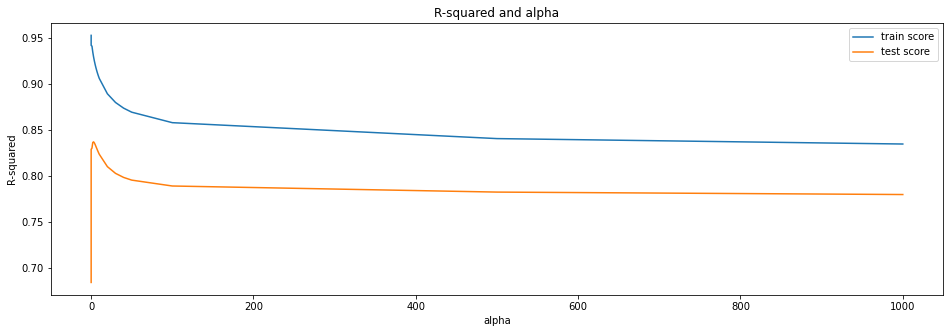

In [44]:
#plotting graph for score and alpha values
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title("R-squared and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [45]:
#dividing alpha value upto more decimal places
params = {'alpha' : [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0]}

ridge = Ridge()

# cross validation
folds = 4
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train,y_train)

Fitting 4 folds for each of 21 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.9s finished


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
                                   1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                                   2.8, 2.9, 3.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [46]:
#printing the new best values
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.7}
0.8373642111030088


In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.005733,8.287765e-04,0.003250,4.455447e-04,1,{'alpha': 1.0},0.788648,0.851097,0.815469,0.866660,0.830468,0.030452,21,0.946688,0.938249,0.942690,0.938131,0.941440,0.003544
1,0.003234,4.190442e-04,0.001995,1.976862e-07,1.1,{'alpha': 1.1},0.789868,0.851342,0.817627,0.867527,0.831591,0.030072,20,0.945936,0.937730,0.941898,0.937227,0.940698,0.003526
2,0.003241,4.322935e-04,0.001745,4.320526e-04,1.2,{'alpha': 1.2},0.790833,0.851579,0.819577,0.868233,0.832556,0.029766,19,0.945213,0.937218,0.941132,0.936360,0.939981,0.003516
3,0.004245,1.297800e-03,0.002986,7.000871e-04,1.3,{'alpha': 1.3},0.791583,0.851803,0.821351,0.868802,0.833385,0.029521,18,0.944517,0.936712,0.940388,0.935525,0.939285,0.003513
4,0.005485,4.984143e-04,0.003248,4.281113e-04,1.4,{'alpha': 1.4},0.792149,0.852011,0.822971,0.869256,0.834097,0.029328,17,0.943846,0.936209,0.939665,0.934720,0.938610,0.003515
5,0.006471,4.926215e-04,0.003491,4.989507e-04,1.5,{'alpha': 1.5},0.792560,0.852202,0.824459,0.869612,0.834708,0.029180,16,0.943199,0.935710,0.938960,0.933942,0.937953,0.003523
6,0.004239,1.295962e-03,0.002493,4.980565e-04,1.6,{'alpha': 1.6},0.792837,0.852375,0.825829,0.869883,0.835231,0.029070,15,0.942573,0.935215,0.938272,0.933189,0.937312,0.003535
7,0.004239,8.276945e-04,0.002991,1.220860e-03,1.7,{'alpha': 1.7},0.792999,0.852529,0.827096,0.870080,0.835676,0.028994,14,0.941967,0.934722,0.937600,0.932459,0.936687,0.003551
8,0.005735,8.274970e-04,0.004239,4.319490e-04,1.8,{'alpha': 1.8},0.793061,0.852664,0.828270,0.870214,0.836052,0.028947,13,0.941380,0.934233,0.936942,0.931750,0.936076,0.003571
9,0.006483,1.496057e-03,0.003742,4.332009e-04,1.9,{'alpha': 1.9},0.793038,0.852781,0.829362,0.870293,0.836368,0.028926,12,0.940812,0.933746,0.936297,0.931061,0.935479,0.003593


In [48]:
#training model on the alpha value as 2.7
alpha = 2.7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
#printing coef. at 2.7
ridge.coef_

array([ 6.12703678e-03,  1.56734290e-02, -1.96963394e-03,  6.05393846e-04,
       -2.17949502e-03,  1.97470272e-02, -5.18410679e-02,  8.14702375e-03,
        4.42793723e-03, -2.80192386e-06, -2.20545032e-02,  2.07964285e-02,
        7.55265789e-02,  1.93868111e-01,  3.25630175e-02, -4.06233674e-03,
       -6.75022077e-02,  2.75217071e-02,  1.42876214e-02,  2.90108640e-02,
       -5.87687923e-02, -1.11468092e-01, -1.14711371e-03, -1.01609417e-01,
       -7.82052814e-02,  9.09153773e-02, -1.03949583e-02, -9.94947765e-04,
       -6.68891235e-02, -4.76654257e-03,  6.39275203e-03, -7.36842239e-04,
       -3.58040830e-02, -1.04600151e-01,  1.06432275e-01, -4.35478752e-02,
        5.88495408e-03, -1.11442322e-01,  1.56876811e-02, -3.09476577e-02,
       -7.41716876e-03,  0.00000000e+00])

In [49]:
# predicting y on the X_test and printing accuracy score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test,y_pred= y_test_pred))

0.8641439034288108


# Lasso Regression By Cross Validation and Grid Search

In Lasso Regression we add a lambda value or alpha value with the absolute of weights in the cost function of the linear regression, so that the coefficients of the column comes to 0,it trys to make coef. of colums to 0 and only gives a coef. value to significant columns in the model, it also helps in feature selection. Also Known as L1 Penalty

## Steps For Lasso Regression

After Data Preparation and Spliting, Scaling Of Data-:

1. Apply Lasso Model from Sklearn Linear Model on different values of alpha, save that values in a dictionary or a list.

2. Make a Object Of Lasso Class.

3. Give the number of folds for cross validation.

4. Apply Grid Search with all the parameters as mentioned above to get accurate alpha value.

5. Fit The Model.

6. Print the best Alpha value and the best accuracy score.

7. Plot a graph between the values of Lasso and accuracy rate.

8. Divide alpha values upto more decimal places for more accurate results and repeat steps 4 to 7.

9. After getting the accurate alpha value, fit the model on that value on Train Data.

10. Predict the Values from the Test Data, and check the accuracy score.

In [50]:
#list of alpha for tuning
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

#lasso object
lasso = Lasso()

#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 


Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.4s finished


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [51]:
#printing best alpha value and best score
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 0.001}
0.8382666780688776


In [52]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.059213,9.393034e-02,0.002494,4.989505e-04,0.001,{'alpha': 0.001},0.807813,0.859610,0.822915,0.862728,0.838267,0.023542,1,0.947978,0.938396,0.945682,0.940293,0.943087,0.003888
1,0.005485,4.987124e-04,0.002245,4.309510e-04,0.001,{'alpha': 0.001},0.807813,0.859610,0.822915,0.862728,0.838267,0.023542,1,0.947978,0.938396,0.945682,0.940293,0.943087,0.003888
2,0.004239,4.322593e-04,0.001994,3.908538e-07,0.01,{'alpha': 0.01},0.706061,0.809082,0.843791,0.814762,0.793424,0.052129,3,0.889953,0.872714,0.874073,0.864918,0.875415,0.009092
3,0.004239,4.318114e-04,0.002494,4.994284e-04,0.05,{'alpha': 0.05},0.720335,0.782659,0.823656,0.778843,0.776373,0.036815,4,0.861095,0.832846,0.811787,0.828035,0.833441,0.017771
4,0.007978,3.526629e-03,0.004987,2.116615e-03,0.1,{'alpha': 0.1},0.713701,0.776891,0.801790,0.779350,0.767933,0.032780,5,0.841839,0.820597,0.797757,0.820872,0.820267,0.015593
5,0.004736,1.476246e-03,0.003491,8.634162e-04,0.2,{'alpha': 0.2},0.710601,0.763878,0.800124,0.787962,0.765641,0.034351,6,0.839659,0.813154,0.796537,0.815522,0.816218,0.015384
6,0.003989,5.685921e-07,0.003740,4.324308e-04,0.3,{'alpha': 0.3},0.709153,0.755197,0.799592,0.792483,0.764106,0.035930,7,0.838897,0.812198,0.795845,0.814699,0.815410,0.015372
7,0.004738,8.282875e-04,0.002243,4.308822e-04,0.4,{'alpha': 0.4},0.707368,0.748335,0.798830,0.796668,0.762800,0.037839,9,0.837831,0.811252,0.794878,0.813545,0.814376,0.015336
8,0.003989,6.165552e-07,0.003242,8.271018e-04,0.5,{'alpha': 0.5},0.705247,0.748040,0.797837,0.800514,0.762910,0.039307,8,0.836461,0.811244,0.793633,0.812061,0.813350,0.015239
9,0.004737,8.274249e-04,0.002744,4.326036e-04,0.6,{'alpha': 0.6},0.702790,0.747743,0.796615,0.804020,0.762792,0.040836,10,0.834785,0.811234,0.792112,0.810247,0.812095,0.015152


In [53]:
#re checking on more values of alpha
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8
                     ,8.9,9.0,9.1,9.2,9,3,9.5,9.5,9.0,
                     10.0,20,30,40,50,100,500,1000,]}

lasso = Lasso()

#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 4 folds for each of 46 candidates, totalling 184 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 184 out of 184 | elapsed:    1.8s finished


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5,
                                   8.6, 8.7, 8.8, 8.9, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [54]:
#printing again 
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 0.001}
0.8382666780688776


In [55]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.011956,2.457522e-03,0.003991,7.054542e-04,0.001,{'alpha': 0.001},0.807813,0.859610,0.822915,0.862728,0.838267,0.023542,1,0.947978,0.938396,0.945682,0.940293,0.943087,0.003888
1,0.005242,8.231544e-04,0.002490,4.956313e-04,0.001,{'alpha': 0.001},0.807813,0.859610,0.822915,0.862728,0.838267,0.023542,1,0.947978,0.938396,0.945682,0.940293,0.943087,0.003888
2,0.005249,1.095890e-03,0.003235,8.323248e-04,0.01,{'alpha': 0.01},0.706061,0.809082,0.843791,0.814762,0.793424,0.052129,3,0.889953,0.872714,0.874073,0.864918,0.875415,0.009092
3,0.005733,8.281822e-04,0.002989,7.052198e-04,0.05,{'alpha': 0.05},0.720335,0.782659,0.823656,0.778843,0.776373,0.036815,4,0.861095,0.832846,0.811787,0.828035,0.833441,0.017771
4,0.005734,1.086475e-03,0.003491,1.115554e-03,0.1,{'alpha': 0.1},0.713701,0.776891,0.801790,0.779350,0.767933,0.032780,5,0.841839,0.820597,0.797757,0.820872,0.820267,0.015593
5,0.004987,1.221834e-03,0.003491,8.637611e-04,0.2,{'alpha': 0.2},0.710601,0.763878,0.800124,0.787962,0.765641,0.034351,6,0.839659,0.813154,0.796537,0.815522,0.816218,0.015384
6,0.005236,1.296054e-03,0.003491,1.115474e-03,0.3,{'alpha': 0.3},0.709153,0.755197,0.799592,0.792483,0.764106,0.035930,7,0.838897,0.812198,0.795845,0.814699,0.815410,0.015372
7,0.005984,1.221493e-03,0.003242,8.268319e-04,0.4,{'alpha': 0.4},0.707368,0.748335,0.798830,0.796668,0.762800,0.037839,9,0.837831,0.811252,0.794878,0.813545,0.814376,0.015336
8,0.003989,5.057622e-07,0.002243,4.319835e-04,0.5,{'alpha': 0.5},0.705247,0.748040,0.797837,0.800514,0.762910,0.039307,8,0.836461,0.811244,0.793633,0.812061,0.813350,0.015239
9,0.003239,4.331365e-04,0.001995,7.974558e-07,0.6,{'alpha': 0.6},0.702790,0.747743,0.796615,0.804020,0.762792,0.040836,10,0.834785,0.811234,0.792112,0.810247,0.812095,0.015152


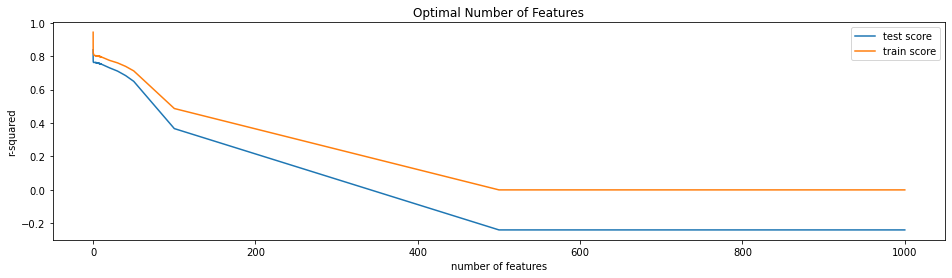

In [56]:
#plot between alpha values and score 
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [57]:
#taking the best alpha value
alpha = 0.001
lasso = Lasso(alpha=alpha)

#fitting in model
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [58]:
#predicting the values of y
y_test_pred = lasso.predict(X_test)

#printing accuracy score
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8538424988824054


In [59]:
#saving coef. of ridge and lasso in every column and saving in DataFrame
coef = pd.DataFrame(index = X.columns)
coef.rows = X.columns
coef["ridge"] = ridge.coef_
coef["lasso"] = lasso.coef_
c= coef.transpose()

## Evaluating Coefficients Of Ridge And Lasso

In [60]:
#printing coef
coef

,ridge,lasso
symboling,0.006127,0.002809
wheelbase,0.015673,0.016315
carlength,-0.001970,-0.003621
curbweight,0.000605,0.000769
enginesize,-0.002179,-0.003120
boreratio,0.019747,0.000000
stroke,-0.051841,0.000000
compressionratio,0.008147,0.005045
horsepower,0.004428,0.003679
peakrpm,-0.000003,0.000005


In [61]:
coef.shape

(42, 2)

## Checking Model Accuracy with Significant Columns From Lasso By Linear Regression

In [62]:
#saving coef. which are having value less than 0 and more than 0
# for feature selection
coef = coef.loc[(coef.lasso < 0) | (coef.lasso > 0)]

In [63]:
#Significant columns
coef

,ridge,lasso
symboling,0.006127,0.002809
wheelbase,0.015673,0.016315
carlength,-0.001970,-0.003621
curbweight,0.000605,0.000769
enginesize,-0.002179,-0.003120
compressionratio,0.008147,0.005045
horsepower,0.004428,0.003679
peakrpm,-0.000003,0.000005
citympg,-0.022055,-0.016602
highwaympg,0.020796,0.017142


In [64]:
#transpoing the coef. as to make significant columns as column 
coef = coef.transpose()

In [65]:
coef

,symboling,wheelbase,carlength,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName_audi,CompanyName_bmw,CompanyName_dodge,CompanyName_honda,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_toyota,aspiration_turbo,carbody_hardtop,carbody_wagon,enginetype_ohc,enginetype_ohcv,cylindernumber_four,fuelsystem_2bbl
ridge,0.006127,0.015673,-0.001970,0.000605,-0.002179,0.008147,0.004428,-0.000003,-0.022055,0.020796,0.075527,0.193868,-0.067502,0.027522,0.029011,-0.058769,-0.111468,-0.101609,-0.078205,0.090915,-0.066889,-0.000737,-0.035804,-0.104600,0.106432,-0.043548,-0.111442,-0.030948
lasso,0.002809,0.016315,-0.003621,0.000769,-0.003120,0.005045,0.003679,0.000005,-0.016602,0.017142,0.125079,0.346709,-0.091384,0.001497,0.020803,-0.050304,-0.139099,-0.226267,-0.108354,0.256258,-0.071845,0.008585,-0.002246,-0.131515,0.057783,-0.015003,-0.065741,-0.007570


In [66]:
#saving significant columns in col
col = coef.columns
col

Index(['symboling', 'wheelbase', 'carlength', 'curbweight', 'enginesize',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_toyota', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_wagon', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_four', 'fuelsystem_2bbl'],
      dtype='object')

In [67]:
#taking data of the above column in a training variable 
X_train_rfe = X_train[col]

#running stats model for descriptive analysis
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


#fitiing stats model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [68]:
X_train_rfe

,const,symboling,wheelbase,carlength,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName_audi,CompanyName_bmw,CompanyName_dodge,CompanyName_honda,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_toyota,aspiration_turbo,carbody_hardtop,carbody_wagon,enginetype_ohc,enginetype_ohcv,cylindernumber_four,fuelsystem_2bbl
108,1.0,0,107.9,186.7,3197,152,21.0,95,4150,28,33,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
25,1.0,1,93.7,157.3,1989,90,9.4,68,5500,31,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
36,1.0,0,96.5,157.1,2024,92,9.2,76,6000,30,34,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
33,1.0,1,93.7,150.0,1940,92,9.2,76,6000,30,34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
105,1.0,3,91.3,170.7,3139,181,7.8,200,5200,17,23,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1.0,0,97.2,173.4,2302,120,8.5,97,5200,27,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
118,1.0,1,93.7,157.3,1918,90,9.4,68,5500,37,41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1
80,1.0,3,96.3,173.0,2370,110,7.5,116,5500,23,30,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
29,1.0,3,95.9,173.2,2811,156,7.0,145,5000,19,24,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [69]:
#checking value 
y_train

108    9.487972
25     8.808668
36     8.894944
33     8.784009
105    9.888323
         ...   
100    9.164192
118    8.625509
80     9.206232
29     9.469932
10     9.706864
Name: price, Length: 138, dtype: float64

In [70]:
#checking value
y_test

9       9.790272
158     8.974365
13      9.957265
20      8.791030
180     9.660779
171     9.354354
189     9.358329
150     8.584478
46      9.310005
101     9.510371
31      8.832734
172     9.779567
3       9.543235
186     9.047233
201     9.854560
165     9.137555
198     9.821192
117     9.806426
95      8.961751
197     9.712024
155     9.080004
67     10.148471
37      8.973985
183     8.984067
166     9.163039
34      8.871926
179     9.680219
82      9.443751
45      9.095659
194     9.468079
185     9.011279
88      9.135509
154     8.974365
54      8.908559
204    10.026811
Name: price, dtype: float64

In [71]:
#stats model summary for checking p value and linear coeff. 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     60.16
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           6.54e-54
Time:                        09:46:04   Log-Likelihood:                 120.06
No. Observations:                 138   AIC:                            -182.1
Df Residuals:                     109   BIC:                            -97.22
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

In [72]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [73]:
#checking VIF of siginificant columns given by Lasso

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,wheelbase,2844.18
2,carlength,2780.06
3,curbweight,1153.44
9,highwaympg,781.91
8,citympg,649.09
7,peakrpm,560.86
6,horsepower,315.75
4,enginesize,292.15
24,enginetype_ohc,56.84
5,compressionratio,44.80


Text(0.5, 0, 'Errors')

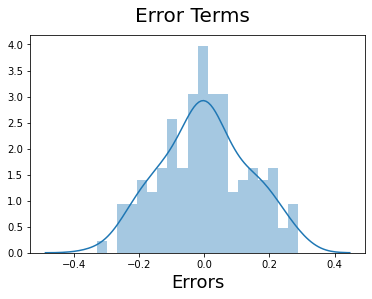

In [74]:
#fitiing new values
lm = sm.OLS(y_train,X_train_new).fit()

#predicting training price
y_train_price = lm.predict(X_train_new)

#ploting error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [75]:
#giving values in X_test
X_test_new = X_test[col]

In [76]:
#predicting in y
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

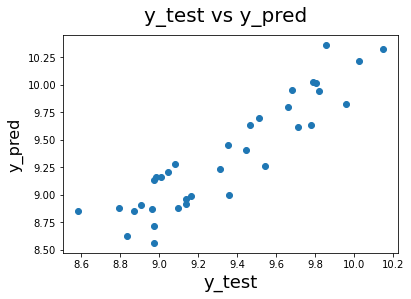

In [77]:
#scatter plot of linear regression
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

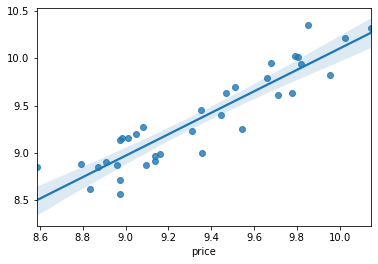

In [78]:
#regression plot in between y_test and y_pred
sns.regplot(y_test,y_pred)

In [79]:
#accuracy score of linear Regression Model
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7306633472309235